In [1]:
import cv2
import numpy as np
import scipy.io as sio
import pandas as pd
from scipy.linalg import svd
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.pyplot as plt



In [2]:
# # Load image
# I = cv2.imread('improved_office_dataset/left/frame_0010.jpg')

# # Let user decide how many points to pick
# N = int(input('How many points do you want to pick? '))

# # Initialize
# uv = np.full((N, 2), np.nan)
# points = []
# current_point = 0

# def mouse_callback(event, x, y, flags, param):
#     global current_point
#     if event == cv2.EVENT_LBUTTONDOWN and current_point < N:
#         uv[current_point] = [x, y]
#         points.append((x, y))
#         current_point += 1
#         draw_image()

# def draw_image():
#     img = I.copy()
#     for i, (x, y) in enumerate(points):
#         cv2.circle(img, (int(x), int(y)), 7, (255, 0, 255), -1)
#         cv2.putText(img, str(i+1), (int(x)+6, int(y)-6), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 3)
    
#     title = f'Click point {current_point+1}/{N}' if current_point < N else 'Press ENTER to finish'
#     cv2.setWindowTitle('Pick 2D points', title)
#     cv2.imshow('Pick 2D points', img)

# # Main loop
# cv2.namedWindow('Pick 2D points', cv2.WINDOW_NORMAL)
# cv2.resizeWindow('Pick 2D points', 800, 600)
# cv2.setMouseCallback('Pick 2D points', mouse_callback)
# draw_image()

# while True:
#     key = cv2.waitKey(1) & 0xFF
#     if key == 13 or current_point >= N:  # ENTER or all points picked
#         break

# cv2.destroyAllWindows()

# # Create homogeneous coordinates and save
# x = np.column_stack([uv, np.ones(N)])


# print(f'Picked {N} points. Now you can measure their 3D coordinates and create X_mm.')

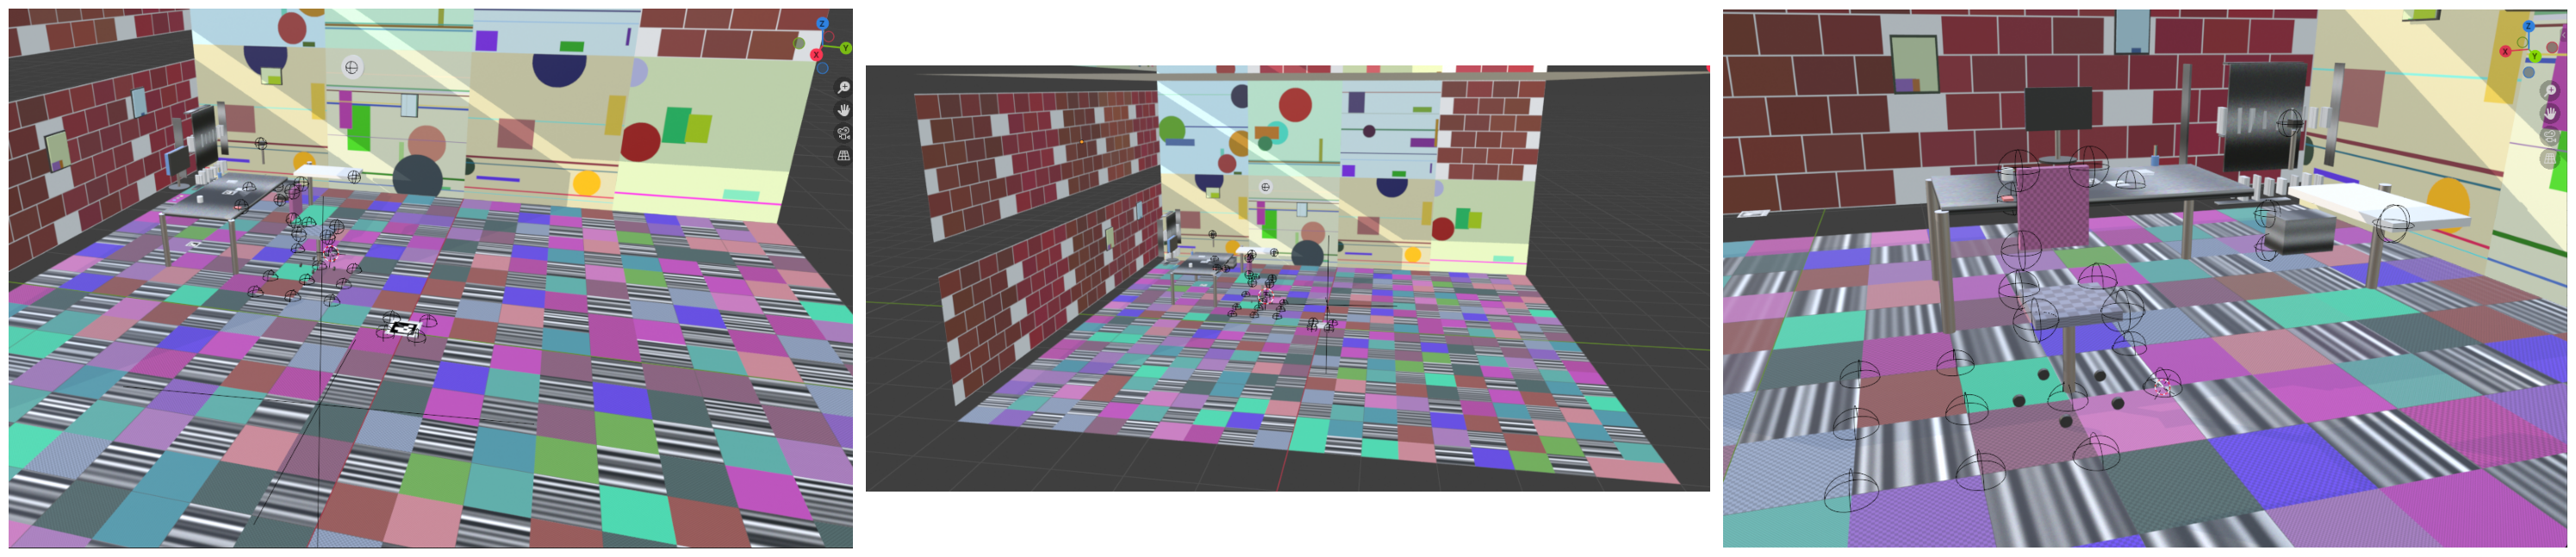

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the JSON data
with open('utils/manual_points.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
points_list = []
for point in data['points']:
    points_list.append({
        'name': point['name'],
        'x': point['position'][0],
        'y': point['position'][1],
        'z': point['position'][2]
    })

df = pd.DataFrame(points_list)

# Sort by the number in the name (ManualPoint_0, ManualPoint_1, etc.)
df['point_num'] = df['name'].str.extract(r'(\d+)').astype(int)
df = df.sort_values('point_num').reset_index(drop=True)
df = df.drop('point_num', axis=1)  # Remove helper column



# office blender pictures
Office_1 = imread('utils/office_1.png')
Office_2 = imread('utils/office_2.png')
Office_3 = imread('utils/office_3.png')

# Show images
fig, axs = plt.subplots(1, 3, figsize=(30, 15))  # Increase figsize
axs[0].imshow(Office_1)
axs[0].axis('off')
axs[1].imshow(Office_2)
axs[1].axis('off')
axs[2].imshow(Office_3)
axs[2].axis('off')
plt.tight_layout()  # Add this to remove excess whitespace
plt.show()

Saved 28 points to manual_points.csv (sorted)

First few points:
            name         x         y         z
0  ManualPoint_0 -1.327915 -1.774987  1.094327
1  ManualPoint_1 -1.330785 -1.774999  0.700657
2  ManualPoint_2 -1.675001 -1.776653  1.097748
3  ManualPoint_3 -1.299996 -1.697616  0.522856
4  ManualPoint_4 -1.700001 -1.302088  0.523966
5  ManualPoint_5 -3.299994 -2.807864  0.517765
6  ManualPoint_6 -3.312191 -2.780892  0.275000
7  ManualPoint_7 -1.301635 -1.300000  0.521695
8  ManualPoint_8 -4.910897 -2.010243  2.200432
9  ManualPoint_9 -0.999770 -1.497568 -0.000002


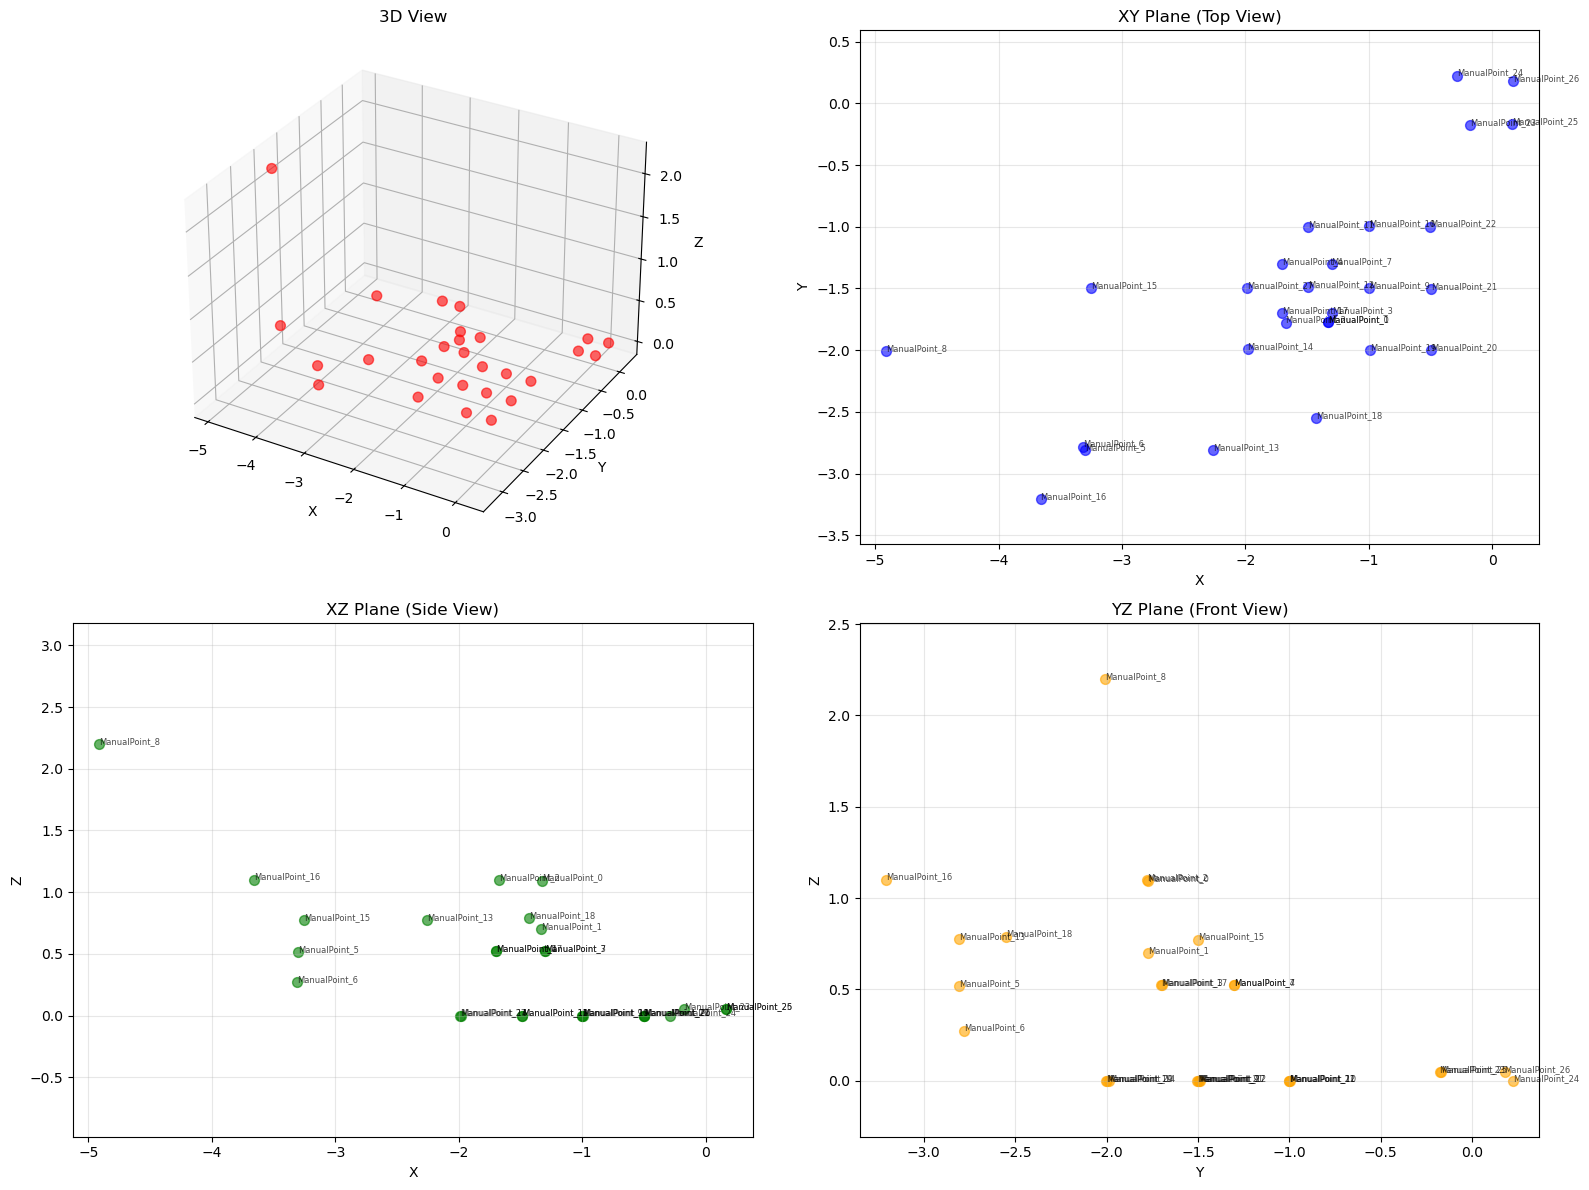

In [4]:

# Save to CSV
df.to_csv('manual_points.csv', index=False)
print(f"Saved {len(df)} points to manual_points.csv (sorted)")

# Display first few
print("\nFirst few points:")
print(df.head(10))

# Create figure with 4 subplots
fig = plt.figure(figsize=(16, 12))

# 3D Plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(df['x'], df['y'], df['z'], c='red', marker='o', s=50, alpha=0.6)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D View')

# XY plane (top view)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(df['x'], df['y'], c='blue', marker='o', s=50, alpha=0.6)
for idx, row in df.iterrows():
    ax2.text(row['x'], row['y'], row['name'], fontsize=6, alpha=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('XY Plane (Top View)')
ax2.grid(True, alpha=0.3)
ax2.axis('equal')

# XZ plane (side view)
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(df['x'], df['z'], c='green', marker='o', s=50, alpha=0.6)
for idx, row in df.iterrows():
    ax3.text(row['x'], row['z'], row['name'], fontsize=6, alpha=0.7)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
ax3.set_title('XZ Plane (Side View)')
ax3.grid(True, alpha=0.3)
ax3.axis('equal')

# YZ plane (front view)
ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(df['y'], df['z'], c='orange', marker='o', s=50, alpha=0.6)
for idx, row in df.iterrows():
    ax4.text(row['y'], row['z'], row['name'], fontsize=6, alpha=0.7)
ax4.set_xlabel('Y')
ax4.set_ylabel('Z')
ax4.set_title('YZ Plane (Front View)')
ax4.grid(True, alpha=0.3)
ax4.axis('equal')

plt.tight_layout()
plt.show()



(-0.5, 1317.5, 988.5, -0.5)

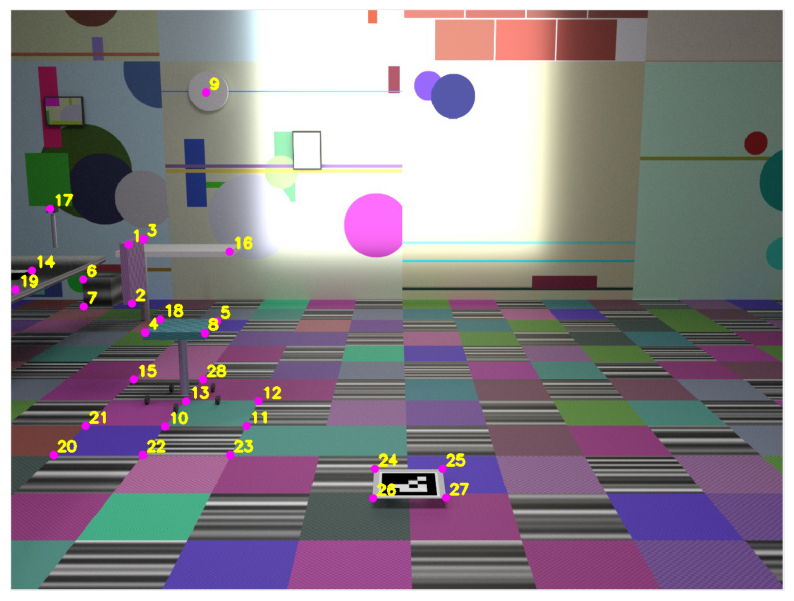

In [5]:
uv_frame1 = pd.read_csv('utils/frame_1_points.csv', header=None).values
uv_frame1_homog = np.column_stack([uv_frame1, np.ones(uv_frame1.shape[0])])

xyz_world = pd.read_csv('utils/manual_points_final.csv')[['x', 'y', 'z']].values
xyz_world_homog = np.column_stack([xyz_world, np.ones(xyz_world.shape[0])])

frame_1_image = imread('utils/frame_1.png')
plt.figure(figsize=(10, 8))
plt.imshow(frame_1_image)
plt.axis('off')

In [6]:
def determineP(uv, Xi):
   
    n = len(uv)
    A = np.zeros((2*n, 12))

    for i in range(n):
        ui, vi = uv[i]
        Xi_i = Xi[i]
        
        A[2*i, 0:4] = Xi_i
        A[2*i, 8:12] = -ui * Xi_i
        
        A[2*i+1, 4:8] = Xi_i
        A[2*i+1, 8:12] = -vi * Xi_i

    
    U, s, Vt = svd(A)
    p = Vt[-1, :]

    
    P = p.reshape(3, 4)
    return P

In [7]:
import numpy as np

def decomposeP(P):
    '''
        The input P is assumed to be a 3-by-4 homogeneous camera matrix.
        The function returns a homogeneous 3-by-3 calibration matrix K,
        a 3-by-3 rotation matrix R and a 3-by-1 vector c such that
        K*R*[eye(3), -c] = P.

    '''

    W = np.array([[0, 0, 1],
                  [0, 1, 0],
                  [1, 0, 0]])

    # calculate K and R up to sign
    Qt, Rt = np.linalg.qr((W.dot(P[:,0:3])).T)
    K = W.dot(Rt.T.dot(W))
    R = W.dot(Qt.T)

    # correct for negative focal length(s) if necessary
    D = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
    if K[0,0] < 0:
        D[0,0] = -1
    if K[1,1] < 0:
        D[1,1] = -1
    if K[2,2] < 0:
        D[2,2] = -1
    K = K.dot(D)
    R = D.dot(R)

    # calculate c
    c = -R.T.dot(np.linalg.inv(K).dot(P[:,3]))

    return K, R, c


In [8]:
P_frame1 = determineP(uv_frame1, xyz_world_homog)
print("Camera Projection Matrix P for Frame 1:")
print(P_frame1)

Camera Projection Matrix P for Frame 1:
[[ 1.23822149e-01 -2.83965852e-01  2.00547046e-02 -5.73774123e-01]
 [ 3.89044330e-02 -4.38942969e-03  2.91593928e-01 -6.98463949e-01]
 [ 1.96984210e-04 -6.79470935e-06  3.40026167e-05 -8.74682624e-04]]


In [9]:
K_frame1, R_frame1, C_frame1 = decomposeP(P_frame1)

K_frame1 = K_frame1/ K_frame1[2,2]


print("Camera intrinsics K (normalized):\n", K_frame1)
print("\nRotation matrix R:\n", R_frame1)
print("\nCamera center C:\n", C_frame1)

Camera intrinsics K (normalized):
 [[1.39763027e+03 4.69305364e-01 6.74973170e+02]
 [0.00000000e+00 1.40356151e+03 4.40152116e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Rotation matrix R:
 [[-0.03262788 -0.99941039 -0.01069114]
 [-0.17026515 -0.00498245  0.98538569]
 [ 0.98485796 -0.03397137  0.17000219]]

Camera center C:
 [ 4.11874373 -0.09435558  1.84438817]


Camera Projection Matrix P for Frame 5:
[[-1.80506718e-01  2.52440396e-01 -2.55943543e-02  5.72271510e-01]
 [-4.03031266e-02 -2.71549596e-04 -2.96559948e-01  6.97114335e-01]
 [-1.96367224e-04 -2.75475211e-05 -4.75545894e-05  8.73437538e-04]]


(-0.5, 1317.5, 988.5, -0.5)

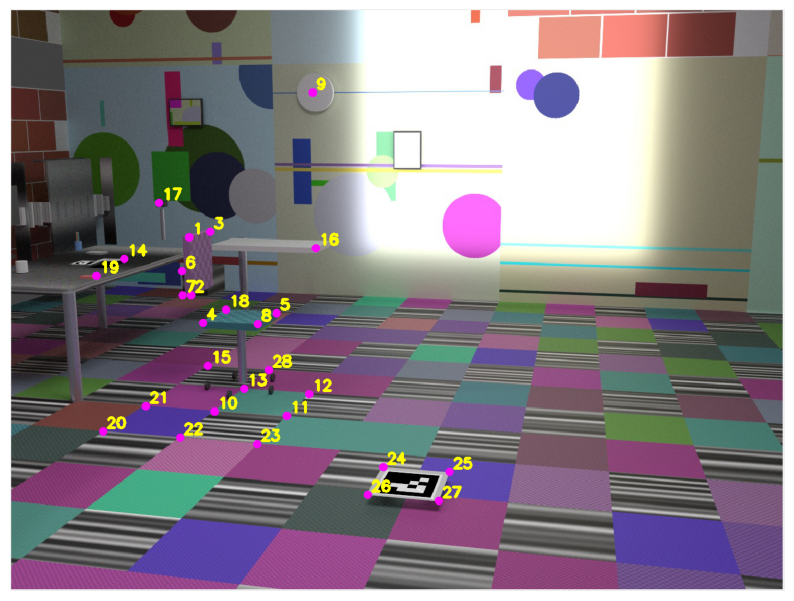

In [10]:
uv_frame5 = pd.read_csv('utils/frame_5_points.csv', header=None).values
uv_frame5_homog = np.column_stack([uv_frame5, np.ones(uv_frame5.shape[0])])

P_frame5 = determineP(uv_frame5, xyz_world_homog)
print("Camera Projection Matrix P for Frame 5:")
print(P_frame5)

frame_5_image = imread('utils/frame_5.png')
plt.figure(figsize=(10, 8))
plt.imshow(frame_5_image)
plt.axis('off')


In [11]:
K_frame5, R_frame5, C_frame5 = decomposeP(P_frame5)

K_frame5 = K_frame5/ K_frame5[2,2] 


print("Camera intrinsics K (normalized):\n", K_frame5)
print("\nRotation matrix R:\n", R_frame5)
print("\nCamera center C:\n", C_frame5)

Camera intrinsics K (normalized):
 [[ 1.34951801e+03 -1.65068762e+01  7.14486418e+02]
 [ 0.00000000e+00  1.36880542e+03  5.29684290e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Rotation matrix R:
 [[-0.1433104   0.98950355  0.01857013]
 [ 0.22825392  0.05130447 -0.97224894]
 [-0.96299651 -0.13509468 -0.23321053]]

Camera center C:
 [3.90765007 0.71161621 1.81895966]


In [12]:
def plot_cameras_and_points(XYZ, P1, P2):
   
    U1, S1, Vt1 = np.linalg.svd(P1)
    C1 = Vt1[-1, :3] / Vt1[-1, 3]
    
    U2, S2, Vt2 = np.linalg.svd(P2)
    C2 = Vt2[-1, :3] / Vt2[-1, 3]
    
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    

    ax.scatter(XYZ[:,0], XYZ[:,1], XYZ[:,2], c='black', s=5, label='World points')
    
    
    ax.scatter(C1[0], C1[1], C1[2], c='red', s=50, marker='^', label='Camera 1')
    ax.scatter(C2[0], C2[1], C2[2], c='blue', s=50, marker='^', label='Camera 2')
    
    
    axis_len = 5
    
    
    ax.quiver(C1[0], C1[1], C1[2], axis_len, 0, 0, color='red', linewidth=0.25, label='1x')
    ax.quiver(C1[0], C1[1], C1[2], 0, axis_len, 0, color='green', linewidth=0.25, label='1y') 
    ax.quiver(C1[0], C1[1], C1[2], 0, 0, axis_len, color='blue', linewidth=0.25, label='1z')
    

    ax.quiver(C2[0], C2[1], C2[2], axis_len, 0, 0, color='red', linewidth=0.25, alpha=0.7)
    ax.quiver(C2[0], C2[1], C2[2], 0, axis_len, 0, color='green', linewidth=0.25, alpha=0.7)
    ax.quiver(C2[0], C2[1], C2[2], 0, 0, axis_len, color='blue', linewidth=0.25, alpha=0.7)
    
    
    ax.text(C1[0] + axis_len*1.1, C1[1], C1[2], '1x', color='red', fontsize=12)
    ax.text(C1[0], C1[1] + axis_len*1.1, C1[2], '1y', color='green', fontsize=12)
    ax.text(C1[0], C1[1], C1[2] + axis_len*1.1, '1z', color='blue', fontsize=12)
    
    ax.text(C2[0] + axis_len*1.1, C2[1], C2[2], '2x', color='red', fontsize=12)
    ax.text(C2[0], C2[1] + axis_len*1.1, C2[2], '2y', color='green', fontsize=12)
    ax.text(C2[0], C2[1], C2[2] + axis_len*1.1, '2z', color='blue', fontsize=12)
    
    
    axis_points = np.array([
        [C1[0] + axis_len, C1[1] + axis_len, C1[2] + axis_len],
        [C1[0] - axis_len, C1[1] - axis_len, C1[2] - axis_len],
        [C2[0] + axis_len, C2[1] + axis_len, C2[2] + axis_len],
        [C2[0] - axis_len, C2[1] - axis_len, C2[2] - axis_len]
    ])
    
    all_points = np.vstack([XYZ, C1.reshape(1,-1), C2.reshape(1,-1), axis_points])
    max_range = np.ptp(all_points, axis=0).max() / 1.5
    center = np.mean(all_points, axis=0)
    
    ax.set_xlim(center[0] - max_range, center[0] + max_range)
    ax.set_ylim(center[1] - max_range, center[1] + max_range)
    ax.set_zlim(center[2] - max_range, center[2] + max_range)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    #ax.view_init(elev=40, azim=-70)
    ax.view_init(elev=-270, azim=-270)
    ax.legend()
    
    plt.show()

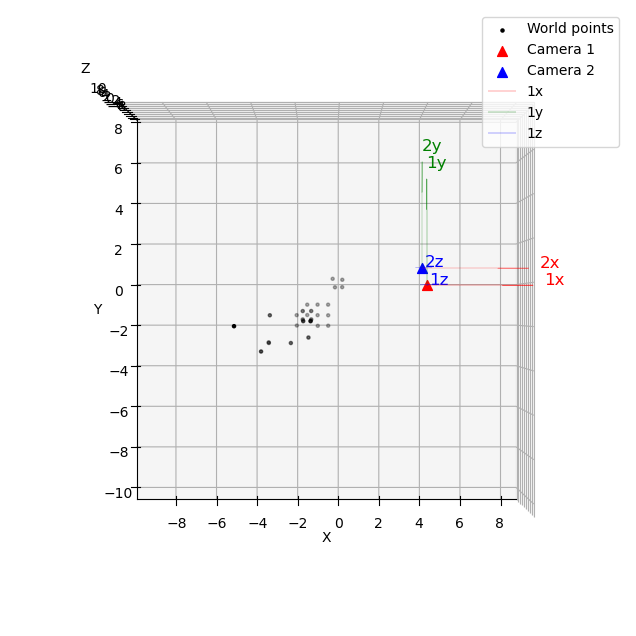

In [13]:
plot_cameras_and_points(xyz_world, P_frame1, P_frame5)

In [14]:
# Load K from ground truth (add this at the top with your other data loading)
with open('improved_office_dataset/ground_truth_poses.json', 'r') as f:
    ground_truth = json.load(f)

camera_intrinsics = ground_truth["camera_intrinsics"]
K = np.array([[camera_intrinsics["fx"], 0, camera_intrinsics["cx"]],
              [0, camera_intrinsics["fy"], camera_intrinsics["cy"]],
              [0, 0, 1]], dtype=np.float64)

print("Loaded camera intrinsics K:")
print(K)

Loaded camera intrinsics K:
[[1.28e+03 0.00e+00 6.40e+02]
 [0.00e+00 1.28e+03 4.80e+02]
 [0.00e+00 0.00e+00 1.00e+00]]


In [15]:
# Using OpenCV's PnP solver
dist_coeffs = np.zeros(5, dtype=np.float32)  # No lens distortion in Blender


xyz_world_cv = xyz_world.astype(np.float32)
uv_frame1_cv = uv_frame1.astype(np.float32)
uv_frame5_cv = uv_frame5.astype(np.float32)
K_cv = K.astype(np.float32)

print("=" * 60)
print("FRAME 1 - OpenCV PnP")
print("=" * 60)

success, rvec1, tvec1 = cv2.solvePnP(
    xyz_world_cv,
    uv_frame1_cv,
    K_cv,
    dist_coeffs,
    flags=cv2.SOLVEPNP_ITERATIVE
)

R_frame1_cv, _ = cv2.Rodrigues(rvec1)
t_frame1_cv = tvec1.flatten()
C_frame1_cv = -R_frame1_cv.T @ t_frame1_cv

print(f"Camera center C: {C_frame1_cv}")
print(f"Distance from origin: {np.linalg.norm(C_frame1_cv):.2f} meters")
print(f"Rotation matrix R:\n{R_frame1_cv}")
print(f"Translation t: {t_frame1_cv}")

print("\n" + "=" * 60)
print("FRAME 5 - OpenCV PnP")
print("=" * 60)

success, rvec5, tvec5 = cv2.solvePnP(
    xyz_world_cv,
    uv_frame5_cv,
    K_cv,
    dist_coeffs,
    flags=cv2.SOLVEPNP_ITERATIVE
)

R_frame5_cv, _ = cv2.Rodrigues(rvec5)
t_frame5_cv = tvec5.flatten()
C_frame5_cv = -R_frame5_cv.T @ t_frame5_cv

print(f"Camera center C: {C_frame5_cv}")
print(f"Distance from origin: {np.linalg.norm(C_frame5_cv):.2f} meters")
print(f"Rotation matrix R:\n{R_frame5_cv}")
print(f"Translation t: {t_frame5_cv}")

# Comparison with ground truth
print("\n" + "=" * 60)
print("COMPARISON WITH GROUND TRUTH")
print("=" * 60)

C_gt_1 = np.array(ground_truth['poses'][0]['left_camera']['translation'])
C_gt_5 = np.array(ground_truth['poses'][4]['left_camera']['translation'])

print(f"\nFrame 1:")
print(f"  OpenCV PnP:     {C_frame1_cv}")
print(f"  Ground Truth:   {C_gt_1}")
print(f"  Error: {np.linalg.norm(C_frame1_cv - C_gt_1):.3f} meters")

print(f"\nFrame 5:")
print(f"  OpenCV PnP:     {C_frame5_cv}")
print(f"  Ground Truth:   {C_gt_5}")
print(f"  Error: {np.linalg.norm(C_frame5_cv - C_gt_5):.3f} meters")

# Also compare with DLT
print("\n" + "=" * 60)
print("COMPARISON: OpenCV PnP vs DLT")
print("=" * 60)

print(f"\nFrame 1:")
print(f"  OpenCV PnP: {C_frame1_cv}")
print(f"  DLT:        {C_frame1}")
print(f"  Difference: {np.linalg.norm(C_frame1_cv - C_frame1):.3f} meters")

print(f"\nFrame 5:")
print(f"  OpenCV PnP: {C_frame5_cv}")
print(f"  DLT:        {C_frame5}")
print(f"  Difference: {np.linalg.norm(C_frame5_cv - C_frame5):.3f} meters")

FRAME 1 - OpenCV PnP
Camera center C: [ 3.68337357 -0.18376903  1.78424228]
Distance from origin: 4.10 meters
Rotation matrix R:
[[ 0.02988258  0.9995104   0.00927337]
 [ 0.20355245  0.00299798 -0.97905945]
 [-0.9786079   0.03114444 -0.2033632 ]]
Translation t: [0.05706441 0.99767049 3.97315111]

FRAME 5 - OpenCV PnP
Camera center C: [3.57735807 0.64472869 1.77643014]
Distance from origin: 4.05 meters
Rotation matrix R:
[[-0.19116686  0.98155532 -0.00209435]
 [ 0.20273967  0.03739754 -0.97851829]
 [-0.96039151 -0.18748488 -0.20614937]]
Translation t: [0.05475591 0.98888572 3.92275117]

COMPARISON WITH GROUND TRUTH

Frame 1:
  OpenCV PnP:     [ 3.68337357 -0.18376903  1.78424228]
  Ground Truth:   [ 4.         -0.06        1.79999995]
  Error: 0.340 meters

Frame 5:
  OpenCV PnP:     [3.57735807 0.64472869 1.77643014]
  Ground Truth:   [3.92506528 0.77295786 1.79999995]
  Error: 0.371 meters

COMPARISON: OpenCV PnP vs DLT

Frame 1:
  OpenCV PnP: [ 3.68337357 -0.18376903  1.78424228]
  D

(-0.5, 1266.5, 949.5, -0.5)

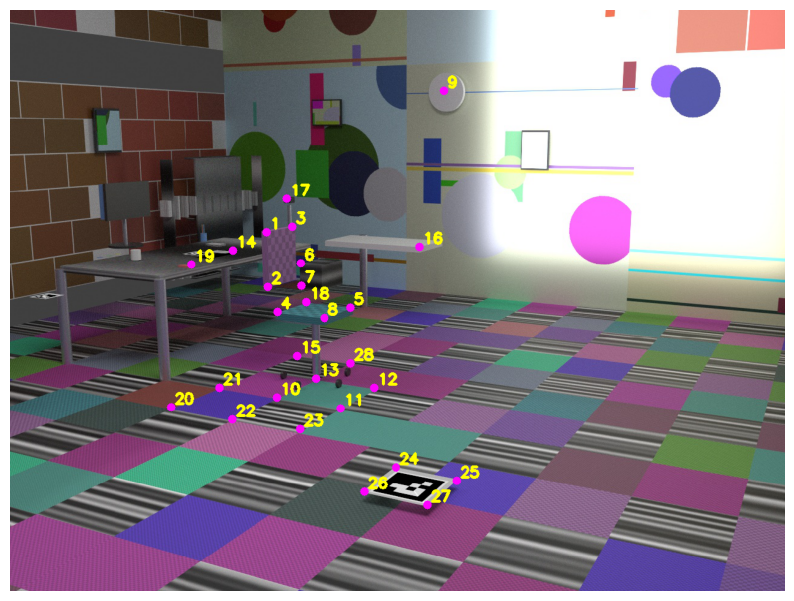

In [16]:
uv_frame10 = pd.read_csv('utils/frame_10_points.csv', header=None).values
uv_frame10_homog = np.column_stack([uv_frame10, np.ones(uv_frame10.shape[0])])


frame_10_image = imread('utils/frame_10.png')
plt.figure(figsize=(10, 8))
plt.imshow(frame_10_image)
plt.axis('off')

In [17]:
print("=" * 60)
print("FRAME 10 - OpenCV PnP")
print("=" * 60)
uv_frame10_cv = uv_frame10.astype(np.float32)

FRAME 10 - OpenCV PnP


In [18]:
success10, rvec10, tvec10 = cv2.solvePnP(
    xyz_world_cv[:8],
    uv_frame10_cv[:8],
    K_cv,
    dist_coeffs,
    flags=cv2.SOLVEPNP_ITERATIVE
)

R_frame10_cv, _ = cv2.Rodrigues(rvec10)
t_frame10_cv = tvec10.flatten()
C_frame10_cv = -R_frame10_cv.T @ t_frame10_cv

print(f"Camera center C: {C_frame10_cv}")
print(f"Rotation matrix R:\n{R_frame10_cv}")
print(f"Translation t: {t_frame10_cv}")


Camera center C: [3.22759571 1.49725463 1.76695701]
Rotation matrix R:
[[-0.43897819  0.89848972 -0.00379031]
 [ 0.18831741  0.08788044 -0.97816848]
 [-0.87854124 -0.43010841 -0.20777885]]
Translation t: [0.07827352 0.9889898  3.84669404]


In [19]:
# Comparison with ground truth
print("\n" + "=" * 60)
print("COMPARISON WITH GROUND TRUTH")
print("=" * 60)

C_gt_10 = np.array(ground_truth['poses'][9]['left_camera']['translation'])

print(f"\nFrame 10:")
print(f"  OpenCV PnP:     {C_frame10_cv}")
print(f"  Ground Truth:   {C_gt_10}")
print(f"  Error: {np.linalg.norm(C_frame10_cv - C_gt_10):.3f} meters")



COMPARISON WITH GROUND TRUTH

Frame 10:
  OpenCV PnP:     [3.22759571 1.49725463 1.76695701]
  Ground Truth:   [3.59126544 1.7625016  1.79999995]
  Error: 0.451 meters



### COMPARISON WITH GROUND TRUTH (18 corresp)

Frame 10:
  OpenCV PnP:     [3.09885855 1.46441462 1.73688337]

  Ground Truth:   [3.59126544 1.7625016  1.79999995]

  Error: 0.579 meters  
  
### COMPARISON WITH GROUND TRUTH (10 corresp)

Frame 10:
  OpenCV PnP:     [3.07540851 1.41520713 1.74537054]

  Ground Truth:   [3.59126544 1.7625016  1.79999995]

  Error: 0.624 meters

### COMPARISON WITH GROUND TRUTH (8 corresp)

Frame 10:
  OpenCV PnP:     [3.19725239 1.44983063 1.72968689]

  Ground Truth:   [3.59126544 1.7625016  1.79999995]
  
  Error: 0.508 meters




### The results don't follow a simple "more points = better" pattern:

18 correspondences: 0.579m error

10 correspondences: 0.624m error

8 correspondences: 0.508m error (best!)

### Why 8 Points Performed Best

This suggests that point quality matters more than quantity after a certain threshold. Possible reasons:

The first 8 points have better spatial distribution - spread across the image rather than clustered

The additional points (9-18) might be less accurate - harder to click precisely, or on less distinctive features

Outliers - if points 9-18 include some bad correspondences (misclicked by 5-10 pixels), they drag down the solution

PnP is solving a least-squares problem - one bad point can hurt the result.

### What This Means for the System

For a real localization system, you need:

Minimum 4-6 points to solve PnP mathematically

Quality over quantity - well-distributed, accurately picked points

RANSAC (what cv2.solvePnP doesn't use by default) to reject outliers

In [20]:
keypoints = [cv2.KeyPoint(x = float(x), y=float(y), size=5) for (x, y) in uv_frame1]


method = "SIFT"  # or "ORB", "BRISK"

if method == "SIFT":
    extractor = cv2.SIFT_create()
elif method == "ORB":
    extractor = cv2.ORB_create()
elif method == "BRISK":
    extractor = cv2.BRISK_create()

frame_1 = cv2.imread('improved_office_dataset/left/frame_0001.jpg')
frame_1_gray = cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY)

keypoints1, descriptors1 = extractor.compute(frame_1_gray, keypoints)

# Inspect
print(f"Method: {method}")
print(f"Number of keypoints: {len(keypoints1)}")
print(f"Descriptor shape: {descriptors1.shape}")




Method: SIFT
Number of keypoints: 28
Descriptor shape: (28, 128)


In [21]:
np.savez('map_descriptors.npz',
         xyz_world=xyz_world,
         descriptors=descriptors1,
         uv_reference=uv_frame1,
         method=np.array([method]))  # Store as array

print(f"Saved map with {len(xyz_world)} 3D points and their descriptors")

Saved map with 28 3D points and their descriptors


In [22]:
keypoints10 = [cv2.KeyPoint(x=float(x), y=float(y), size=5) for (x, y) in uv_frame10]

frame_10 = cv2.imread('improved_office_dataset/left/frame_0010.jpg')
frame_10_gray = cv2.cvtColor(frame_10, cv2.COLOR_BGR2GRAY)

keypoints10, descriptors10 = extractor.compute(frame_10_gray, keypoints10)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors10, k=2)

# 3. Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.98 * n.distance:
        good_matches.append(m)

print(f"\nMatching results:")
print(f"Total possible matches: {len(descriptors1)}")
print(f"Good matches found: {len(good_matches)}")

# 4. Check if matches are correct (should be 1-to-1 since same order)
# for match in good_matches:
#     print(f"Point {match.queryIdx} in frame1 → Point {match.trainIdx} in frame10")


# # Check descriptor distances
# print("\nAll match distances:")
# for i, (m, n) in enumerate(matches):
#     print(f"Point {i}: best={m.distance:.1f}, second={n.distance:.1f}, ratio={m.distance/n.distance:.3f}")


correct_matches = [m for m in good_matches if m.queryIdx == m.trainIdx]

print(f"Correct matches: {len(correct_matches)}")

for match in correct_matches:
    print(f"Point {match.queryIdx} in frame1 → Point {match.trainIdx} in frame10")



Matching results:
Total possible matches: 28
Good matches found: 26
Correct matches: 17
Point 1 in frame1 → Point 1 in frame10
Point 5 in frame1 → Point 5 in frame10
Point 6 in frame1 → Point 6 in frame10
Point 8 in frame1 → Point 8 in frame10
Point 10 in frame1 → Point 10 in frame10
Point 11 in frame1 → Point 11 in frame10
Point 12 in frame1 → Point 12 in frame10
Point 13 in frame1 → Point 13 in frame10
Point 14 in frame1 → Point 14 in frame10
Point 15 in frame1 → Point 15 in frame10
Point 16 in frame1 → Point 16 in frame10
Point 17 in frame1 → Point 17 in frame10
Point 18 in frame1 → Point 18 in frame10
Point 19 in frame1 → Point 19 in frame10
Point 20 in frame1 → Point 20 in frame10
Point 21 in frame1 → Point 21 in frame10
Point 27 in frame1 → Point 27 in frame10


In [23]:
matched_3d = np.array([xyz_world[m.queryIdx] for m in correct_matches], dtype=np.float32)
matched_2d = np.array([uv_frame10[m.trainIdx] for m in correct_matches], dtype=np.float32)

# Solve PnP with only correct matches
success, rvec, tvec = cv2.solvePnP(matched_3d, matched_2d, K_cv, dist_coeffs)
R, _ = cv2.Rodrigues(rvec)
C = -R.T @ tvec.flatten()

print(f"Camera center: {C}")
print(f"Ground truth:  {C_gt_10}")
print(f"Error: {np.linalg.norm(C - C_gt_10):.3f} meters")

Camera center: [3.15597927 1.47976909 1.74415112]
Ground truth:  [3.59126544 1.7625016  1.79999995]
Error: 0.522 meters


In [24]:
# Use RANSAC version
matched_3d_all = np.array([xyz_world[m.queryIdx] for m in good_matches], dtype=np.float32)
matched_2d_all = np.array([uv_frame10[m.trainIdx] for m in good_matches], dtype=np.float32)

success, rvec, tvec, inliers = cv2.solvePnPRansac(
    matched_3d_all,    # All 14 matches (including wrong ones)
    matched_2d_all,
    K_cv,
    dist_coeffs,
    reprojectionError=8.0,  # Pixel threshold
    confidence=0.99
)

print(f"RANSAC found {len(inliers)} inliers out of {len(good_matches)} matches")
print(f"Inlier indices: {inliers.flatten()}")

R, _ = cv2.Rodrigues(rvec)
C = -R.T @ tvec.flatten()
print(f"\nCamera center: {C}")
print(f"Error: {np.linalg.norm(C - C_gt_10):.3f} meters")

RANSAC found 15 inliers out of 26 matches
Inlier indices: [ 1  4  5  7  8  9 10 11 12 13 14 15 16 18 25]

Camera center: [3.10789331 1.48031031 1.7311171 ]
Error: 0.564 meters


In [25]:
map_data = np.load('map_descriptors.npz', allow_pickle=True)

print("Loaded map from disk:")
print(f"  3D points: {map_data['xyz_world'].shape}")
print(f"  Descriptors: {map_data['descriptors'].shape}")
print(f"  Method: {map_data['method']}")

# Extract the arrays
xyz_world_map = map_data['xyz_world']
descriptors_map = map_data['descriptors']
method = str(map_data['method'])

uv_frame10_random = pd.read_csv('utils/frame_10_rand.csv', header=None).values
print(f"\nClicked {len(uv_frame10_random)} random points on frame 10")

keypoints_random = [cv2.KeyPoint(x=float(x), y=float(y), size=5) 
                    for (x, y) in uv_frame10_random]

frame_10 = cv2.imread('improved_office_dataset/left/frame_0010.jpg')
frame_10_gray = cv2.cvtColor(frame_10, cv2.COLOR_BGR2GRAY)

if method == "SIFT":
    extractor = cv2.SIFT_create()
elif method == "ORB":
    extractor = cv2.ORB_create()

keypoints_random, descriptors_random = extractor.compute(frame_10_gray, keypoints_random)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors_map, descriptors_random, k=2)

# Ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.95 * n.distance:
        good_matches.append(m)

print(f"\nMatching results:")
print(f"Map has {len(descriptors_map)} points")
print(f"You clicked {len(descriptors_random)} random points")
print(f"Good matches found: {len(good_matches)}")


print("\nIdentified correspondences:")
for match in good_matches:
    map_idx = match.queryIdx
    click_idx = match.trainIdx
    print(f"Click #{click_idx} → Map point #{map_idx}")



Loaded map from disk:
  3D points: (28, 3)
  Descriptors: (28, 128)
  Method: ['SIFT']

Clicked 28 random points on frame 10

Matching results:
Map has 28 points
You clicked 28 random points
Good matches found: 21

Identified correspondences:
Click #25 → Map point #0
Click #9 → Map point #1
Click #1 → Map point #3
Click #10 → Map point #4
Click #2 → Map point #5
Click #3 → Map point #6
Click #20 → Map point #8
Click #12 → Map point #9
Click #14 → Map point #11
Click #24 → Map point #12
Click #23 → Map point #13
Click #12 → Map point #14
Click #1 → Map point #15
Click #0 → Map point #16
Click #11 → Map point #17
Click #4 → Map point #18
Click #19 → Map point #19
Click #26 → Map point #21
Click #5 → Map point #24
Click #27 → Map point #25
Click #21 → Map point #26


In [26]:
# After getting good_matches, keep only best match per click
click_to_map = {}  # Dictionary: click_idx -> (map_idx, distance)

for match in good_matches:
    map_idx = match.queryIdx
    click_idx = match.trainIdx
    distance = match.distance
    
    # Keep only the best (lowest distance) match for each click
    if click_idx not in click_to_map or distance < click_to_map[click_idx][1]:
        click_to_map[click_idx] = (map_idx, distance)

print(f"\nUnique correspondences (best match per click):")
print(f"Total: {len(click_to_map)}")

for click_idx, (map_idx, dist) in click_to_map.items():
    print(f"Click #{click_idx} → Map point #{map_idx} (distance: {dist:.1f})")


Unique correspondences (best match per click):
Total: 19
Click #25 → Map point #0 (distance: 420.2)
Click #9 → Map point #1 (distance: 348.4)
Click #1 → Map point #15 (distance: 203.5)
Click #10 → Map point #4 (distance: 459.5)
Click #2 → Map point #5 (distance: 472.8)
Click #3 → Map point #6 (distance: 305.3)
Click #20 → Map point #8 (distance: 349.2)
Click #12 → Map point #14 (distance: 298.3)
Click #14 → Map point #11 (distance: 250.9)
Click #24 → Map point #12 (distance: 384.3)
Click #23 → Map point #13 (distance: 327.2)
Click #0 → Map point #16 (distance: 285.6)
Click #11 → Map point #17 (distance: 317.0)
Click #4 → Map point #18 (distance: 412.8)
Click #19 → Map point #19 (distance: 266.2)
Click #26 → Map point #21 (distance: 376.7)
Click #5 → Map point #24 (distance: 465.8)
Click #27 → Map point #25 (distance: 460.7)
Click #21 → Map point #26 (distance: 442.1)


In [27]:
# Build correspondence arrays for PnP
matched_3d = []
matched_2d = []

for click_idx, (map_idx, dist) in click_to_map.items():
    matched_3d.append(xyz_world_map[map_idx])
    matched_2d.append(uv_frame10_random[click_idx])

matched_3d = np.array(matched_3d, dtype=np.float32)
matched_2d = np.array(matched_2d, dtype=np.float32)

print(f"\nBuilt {len(matched_3d)} 2D-3D correspondences")

# Solve with RANSAC (to reject any wrong matches)
success, rvec, tvec, inliers = cv2.solvePnPRansac(
    matched_3d,
    matched_2d,
    K_cv,
    dist_coeffs,
    reprojectionError=8.0,
    confidence=0.99
)

if success:
    print(f"RANSAC found {len(inliers)} inliers from {len(matched_3d)} matches")
    
    R, _ = cv2.Rodrigues(rvec)
    C = -R.T @ tvec.flatten()
    
    print(f"\nEstimated camera center: {C}")
    print(f"Ground truth:            {C_gt_10}")
    
    error = np.linalg.norm(C - C_gt_10)
    print(f"\nLocalization error: {error:.3f} meters")
    
    
else:
    print("PnP failed - not enough good matches")


Built 19 2D-3D correspondences
RANSAC found 11 inliers from 19 matches

Estimated camera center: [3.20470258 1.39101115 1.69953847]
Ground truth:            [3.59126544 1.7625016  1.79999995]

Localization error: 0.545 meters


In [42]:
from pathlib import Path
import numpy as np
import pandas as pd

map_path = Path("map/project_files")
points_3d = map_path / "points3D.txt"

# Parse 3D points WITH track info
points = []
with open(points_3d, 'r') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        
        parts = line.strip().split()
        
        if len(parts) >= 8:
            point_id = int(parts[0])
            x, y, z = float(parts[1]), float(parts[2]), float(parts[3])
            error = float(parts[7])
            
            # Parse track: pairs of (IMAGE_ID, POINT2D_IDX)
            track = []
            for i in range(8, len(parts), 2):
                if i+1 < len(parts):
                    img_id = int(parts[i])
                    kp_idx = int(parts[i+1])
                    track.append((img_id, kp_idx))
            
            points.append({
                'id': point_id,
                'xyz': np.array([x, y, z]),
                'track': track
            })

print(f"Loaded {len(points)} 3D points")
print(f"First point: {points[0]}")

Loaded 21552 3D points
First point: {'id': 1, 'xyz': array([ 0.31013958, -1.44974883,  4.47249474]), 'track': [(11, 38), (1, 36), (121, 36), (12, 35), (120, 49), (119, 65)]}


In [43]:
dataset_path = Path("improved_office_dataset/left")
descriptors_path = Path("map/descriptors_txt")

data = []
for img_path, desc_path in zip(sorted(dataset_path.glob("*.jpg")), 
                                 sorted(descriptors_path.glob("*.txt"))):
    descriptors = []
    with open(desc_path, 'r') as f:
        for line in f:
            values = line.strip()
            if values: 
                descriptor_array = np.array([int(x) for x in values.split()])
                descriptors.append(descriptor_array)
    
    data.append({
        'image': img_path.name,
        'descriptors': np.array(descriptors) 
    })

df = pd.DataFrame(data)
print(f"Loaded {len(data)} images")

Loaded 121 images


In [45]:
# Load image IDs to names mapping
images_data = {}
with open(map_path / "images.txt", 'r') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        
        parts = line.strip().split()
        
        # Image line has: IMAGE_ID QW QX QY QZ TX TY TZ CAMERA_ID NAME
        # Check if this is an image line (not keypoints line)
        if len(parts) == 10:
            img_id = int(parts[0])
            img_name = parts[9]
            images_data[img_id] = img_name

print(f"Loaded {len(images_data)} image mappings")

# Build map using first observation of each point
map_3d_points = []
map_descriptors = []

for point in points:
    if len(point['track']) > 0:
        first_img_id, first_kp_idx = point['track'][0]
        
        img_name = images_data.get(first_img_id)
        
        if img_name:
            img_row = df[df['image'] == img_name]
            
            if not img_row.empty:
                descriptors = img_row.iloc[0]['descriptors']
                
                if first_kp_idx < len(descriptors):
                    map_3d_points.append(point['xyz'])
                    map_descriptors.append(descriptors[first_kp_idx])

map_3d_points = np.array(map_3d_points, dtype=np.float32)
map_descriptors = np.array(map_descriptors, dtype=np.float32)

print(f"\nBuilt map with {len(map_3d_points)} points")
print(f"3D points shape: {map_3d_points.shape}")
print(f"Descriptors shape: {map_descriptors.shape}")

Loaded 121 image mappings

Built map with 21552 points
3D points shape: (21552, 3)
Descriptors shape: (21552, 128)


In [46]:
# Save the COLMAP map
np.savez('map/colmap_map.npz', 
         xyz_world=map_3d_points,
         descriptors=map_descriptors,
         method='SIFT')

print("Saved COLMAP map to colmap_map.npz")

Saved COLMAP map to colmap_map.npz


In [47]:
# Load frame 10
frame_10 = cv2.imread('improved_office_dataset/left/frame_0010.jpg')
frame_10_gray = cv2.cvtColor(frame_10, cv2.COLOR_BGR2GRAY)

# Detect features in frame 10
extractor = cv2.SIFT_create()
keypoints_10, descriptors_10 = extractor.detectAndCompute(frame_10_gray, None)

print(f"Frame 10: Detected {len(keypoints_10)} keypoints")

# Match against COLMAP map
bf = cv2.BFMatcher()
matches = bf.knnMatch(map_descriptors, descriptors_10, k=2)

# Ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Good matches: {len(good_matches)}")

# Filter for unique matches (best match per detected keypoint)
map_to_query = {}
for match in good_matches:
    map_idx = match.queryIdx
    query_idx = match.trainIdx
    distance = match.distance
    
    if query_idx not in map_to_query or distance < map_to_query[query_idx][1]:
        map_to_query[query_idx] = (map_idx, distance)

print(f"Unique correspondences: {len(map_to_query)}")

Frame 10: Detected 1529 keypoints
Good matches: 470
Unique correspondences: 261


In [ ]:
# Build correspondence arrays
matched_3d = []
matched_2d = []

for query_idx, (map_idx, dist) in map_to_query.items():
    matched_3d.append(map_3d_points[map_idx])
    matched_2d.append(keypoints_10[query_idx].pt)

matched_3d = np.array(matched_3d, dtype=np.float32)
matched_2d = np.array(matched_2d, dtype=np.float32)

print(f"Built {len(matched_3d)} 2D-3D correspondences")

# Localize with RANSAC
K_cv = K.astype(np.float32)
dist_coeffs = np.zeros(5, dtype=np.float32)

success, rvec, tvec, inliers = cv2.solvePnPRansac(
    matched_3d,
    matched_2d,
    K_cv,
    dist_coeffs,
    reprojectionError=8.0,
    confidence=0.99
)

if success:
    print(f"RANSAC: {len(inliers)} inliers from {len(matched_3d)} matches")
    
    R, _ = cv2.Rodrigues(rvec)
    C = -R.T @ tvec.flatten()
    
   
    error = np.linalg.norm(C - C_gt_10)
    
    print(f"\nEstimated camera: {C}")
    print("\n" + "="*60)
    print("COLMAP MAP + AUTOMATIC SIFT LOCALIZATION SUCCESSFUL!")
    print("="*60)
else:
    print("Localization failed")

Built 261 2D-3D correspondences
RANSAC: 96 inliers from 261 matches

Estimated camera: [ 1.44367447  0.87779769 -3.0378698 ]

COLMAP MAP + AUTOMATIC SIFT LOCALIZATION SUCCESSFUL!


In [49]:
# Parse COLMAP camera poses
colmap_poses = {}
with open(map_path / "images.txt", 'r') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        
        parts = line.strip().split()
        
        if len(parts) == 10:  # Image line
            img_id = int(parts[0])
            qw, qx, qy, qz = float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])
            tx, ty, tz = float(parts[5]), float(parts[6]), float(parts[7])
            img_name = parts[9]
            
            # Convert quaternion to rotation matrix
            from scipy.spatial.transform import Rotation
            R_colmap = Rotation.from_quat([qx, qy, qz, qw]).as_matrix()
            t_colmap = np.array([tx, ty, tz])
            
            # Camera center: C = -R^T @ t
            C_colmap = -R_colmap.T @ t_colmap
            
            colmap_poses[img_name] = {
                'R': R_colmap,
                't': t_colmap,
                'C': C_colmap
            }

print(f"Loaded {len(colmap_poses)} COLMAP poses")

# Get ground truth for frame 10
C_gt_colmap = colmap_poses['frame_0010.jpg']['C']
print(f"\nCOLMAP ground truth for frame_0010.jpg:")
print(f"Camera center: {C_gt_colmap}")

Loaded 121 COLMAP poses

COLMAP ground truth for frame_0010.jpg:
Camera center: [ 1.62143621  0.68599827 -3.25151133]


In [50]:
if success:
    error_colmap = np.linalg.norm(C - C_gt_colmap)
    
    print(f"\nEstimated camera: {C}")
    print(f"COLMAP GT:        {C_gt_colmap}")
    print(f"Error: {error_colmap:.3f} meters")
    
    print(f"\nInliers: {len(inliers)}/{len(matched_3d)}")


Estimated camera: [ 1.44367447  0.87779769 -3.0378698 ]
COLMAP GT:        [ 1.62143621  0.68599827 -3.25151133]
Error: 0.338 meters

Inliers: 96/261


In [51]:
# Test frame 60 - different position on trajectory
frame_60 = cv2.imread('improved_office_dataset/left/frame_0060.jpg')
frame_60_gray = cv2.cvtColor(frame_60, cv2.COLOR_BGR2GRAY)

print("Testing Frame 60 Localization")
print("="*60)

# Detect features
keypoints_60, descriptors_60 = extractor.detectAndCompute(frame_60_gray, None)
print(f"Detected {len(keypoints_60)} keypoints")

# Match against map
matches = bf.knnMatch(map_descriptors, descriptors_60, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Good matches: {len(good_matches)}")

# Filter unique
map_to_query = {}
for match in good_matches:
    map_idx = match.queryIdx
    query_idx = match.trainIdx
    distance = match.distance
    
    if query_idx not in map_to_query or distance < map_to_query[query_idx][1]:
        map_to_query[query_idx] = (map_idx, distance)

print(f"Unique correspondences: {len(map_to_query)}")

# Build correspondences
matched_3d = []
matched_2d = []

for query_idx, (map_idx, dist) in map_to_query.items():
    matched_3d.append(map_3d_points[map_idx])
    matched_2d.append(keypoints_60[query_idx].pt)

matched_3d = np.array(matched_3d, dtype=np.float32)
matched_2d = np.array(matched_2d, dtype=np.float32)

# Localize
success, rvec, tvec, inliers = cv2.solvePnPRansac(
    matched_3d,
    matched_2d,
    K_cv,
    dist_coeffs,
    reprojectionError=8.0,
    confidence=0.99
)

if success:
    R, _ = cv2.Rodrigues(rvec)
    C = -R.T @ tvec.flatten()
    
    C_gt_60 = colmap_poses['frame_0060.jpg']['C']
    error = np.linalg.norm(C - C_gt_60)
    
    print(f"\nEstimated camera: {C}")
    print(f"COLMAP GT:        {C_gt_60}")
    print(f"Error: {error:.3f} meters")
    print(f"Inliers: {len(inliers)}/{len(matched_3d)}")
    
    print("\n" + "="*60)
    print("✓ Frame 60 localized successfully!")
    print("="*60)
else:
    print("Localization failed")

Testing Frame 60 Localization
Detected 563 keypoints
Good matches: 293
Unique correspondences: 92

Estimated camera: [ 0.37513795 -0.356242    3.543011  ]
COLMAP GT:        [ 0.28307428 -0.6809563   3.69879709]
Error: 0.372 meters
Inliers: 33/92

✓ Frame 60 localized successfully!


In [52]:
# Test frame 1 - starting position
frame_1 = cv2.imread('improved_office_dataset/left/frame_0001.jpg')
frame_1_gray = cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY)

print("Testing Frame 1 Localization")
print("="*60)

# Detect features
keypoints_1, descriptors_1 = extractor.detectAndCompute(frame_1_gray, None)
print(f"Detected {len(keypoints_1)} keypoints")

# Match against map
matches = bf.knnMatch(map_descriptors, descriptors_1, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Good matches: {len(good_matches)}")

# Filter unique
map_to_query = {}
for match in good_matches:
    map_idx = match.queryIdx
    query_idx = match.trainIdx
    distance = match.distance
    
    if query_idx not in map_to_query or distance < map_to_query[query_idx][1]:
        map_to_query[query_idx] = (map_idx, distance)

print(f"Unique correspondences: {len(map_to_query)}")

# Build correspondences
matched_3d = []
matched_2d = []

for query_idx, (map_idx, dist) in map_to_query.items():
    matched_3d.append(map_3d_points[map_idx])
    matched_2d.append(keypoints_1[query_idx].pt)

matched_3d = np.array(matched_3d, dtype=np.float32)
matched_2d = np.array(matched_2d, dtype=np.float32)

# Localize
success, rvec, tvec, inliers = cv2.solvePnPRansac(
    matched_3d,
    matched_2d,
    K_cv,
    dist_coeffs,
    reprojectionError=8.0,
    confidence=0.99
)

if success:
    R, _ = cv2.Rodrigues(rvec)
    C = -R.T @ tvec.flatten()
    
    C_gt_1 = colmap_poses['frame_0001.jpg']['C']
    error = np.linalg.norm(C - C_gt_1)
    
    print(f"\nEstimated camera: {C}")
    print(f"COLMAP GT:        {C_gt_1}")
    print(f"Error: {error:.3f} meters")
    print(f"Inliers: {len(inliers)}/{len(matched_3d)}")
    
    print("\n" + "="*60)
    print("✓ Frame 1 localized successfully!")
    print("="*60)
else:
    print("Localization failed")

Testing Frame 1 Localization
Detected 1236 keypoints
Good matches: 443
Unique correspondences: 237

Estimated camera: [-0.18354164  0.89020073 -3.3277804 ]
COLMAP GT:        [-0.07932866  0.66954451 -3.63511393]
Error: 0.392 meters
Inliers: 85/237

✓ Frame 1 localized successfully!
